In [2]:
import os, pandas as pd, numpy as np

In [3]:
os.chdir("E:\\VCU\\Summer 2024\\Statistical Analysis & Modeling")

In [4]:
df=pd.read_csv("NSSO68.csv",encoding="Latin-1", low_memory=False)

In [5]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [6]:
MH = df[df['state_1']=="MH"]

In [7]:
MH.isnull().sum().sort_values(ascending = False)

soyabean_q         8043
soyabean_v         8043
Meals_School       7953
Meals_Employer     7899
Land_Leased_out    7880
                   ... 
palak_q               0
carrot_q              0
radish_q              0
brinjal_q             0
fv_tot                0
Length: 384, dtype: int64

In [8]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [9]:
MH_new = MH[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [10]:
MH_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       184
state_1               0
District              0
Sector                0
Region                0
State_Region          0
ricetotal_q           0
wheattotal_q          0
moong_q               0
Milktotal_q           0
chicken_q             0
bread_q               0
foodtotal_q           0
Beveragestotal_v      0
dtype: int64

In [11]:
MH_clean = MH_new.copy()

In [12]:
MH_clean.loc[:, 'Meals_At_Home'] = MH_clean['Meals_At_Home'].fillna(MH_new['Meals_At_Home'].mean())

In [13]:
MH_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

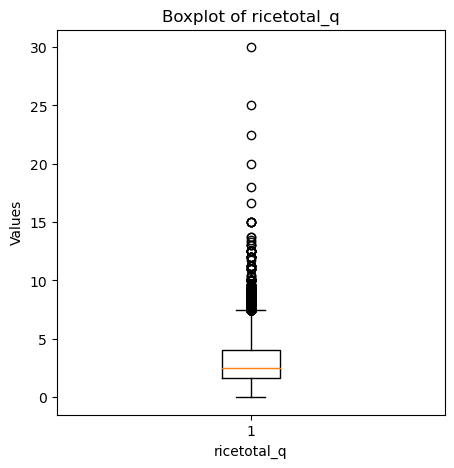

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.boxplot(MH_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [15]:
rice1 = MH_clean['ricetotal_q'].quantile(0.25)
rice2 = MH_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [16]:
MH_clean=MH_new[(MH_new['ricetotal_q']<=up_limit)&(MH_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1f1c2540650>,
 'caps': [<matplotlib.lines.Line2D at 0x1f1c1e1d950>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f1c254ccd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f1c1e1e150>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f1c1e1de10>],
 'means': []}

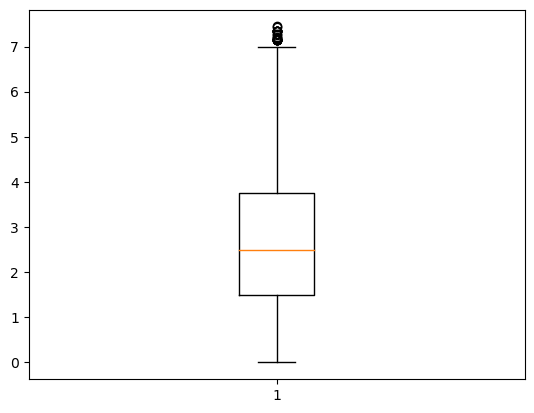

In [17]:
plt.boxplot(MH_clean['ricetotal_q'])

In [18]:
MH_clean['District'].unique()

array([21, 24, 22,  9, 13, 14, 12, 11,  7,  4,  5,  6,  8, 10, 28, 20, 27,
       18, 19, 17, 15,  2,  3,  1, 16, 25, 34, 35, 33, 31, 30, 29, 26, 32],
      dtype=int64)

In [20]:
MH_clean.loc[:,'Sector'] = MH_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [21]:
MH_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [22]:
MH_clean.loc[:, 'total_consumption'] = MH_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

C:\Users\Ferah Shan\AppData\Local\Temp\ipykernel_25568\844354034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MH_clean.loc[:, 'total_consumption'] = MH_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)


In [23]:
MH_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
7577,MH,21,RURAL,1,271,3.25,5.000000,0.500000,0,0.500000,0.250000,22.900388,12.50,56.0,44.900388
7578,MH,21,RURAL,1,271,6.00,1.666667,0.333333,0,0.333333,0.333333,31.650533,25.00,60.0,65.317200
7579,MH,21,RURAL,1,271,0.00,0.000000,0.000000,0,0.000000,0.000000,0.000000,25.00,0.0,25.000000
7580,MH,21,RURAL,1,271,3.00,5.000000,0.250000,0,0.000000,0.000000,19.337788,15.00,60.0,42.587788
7581,MH,21,RURAL,1,271,2.50,5.000000,0.250000,0,0.250000,0.000000,23.300338,46.25,60.0,77.550337


In [24]:
MH_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                            
                     std       mean         max  min
Region                                              
1              55.720954  66.648562  498.594137  0.0
2              28.564741  49.993942  288.988305  0.0
3              27.304392  43.114057  295.575850  0.0
4              24.521688  44.501585  256.150433  0.0
5              25.762363  46.127545  244.700687  0.0
6              17.774506  40.017974  178.650170  0.0

In [25]:
MH_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                13.525049  34.780813   99.383150  10.301250
2                20.245713  39.647014  138.224383   1.751100
3                32.175292  42.587370  295.575850   6.240000
4                19.684990  39.499138  177.727500  13.408180
5                24.070561  46.402107  177.950868   0.000000
6                15.364327  38.700840  118.343975  14.114650
7                17.274821  42.912575  164.151860  16.578475
8                35.144378  60.156223  170.000000  22.504165
9                33.258979  54.633000  244.700687   0.600000
10               24.182858  43.008974  178.650170   0.000000
11               19.020258  46.144017  132.985428  25.500205
12               17.610871  39.318932  111.928513  15.250000
13               13.052206  37.205830   82.450567   0.000000
14               11.909939  37.156571  133.955800  15.406370
15               24.695805  42.706426  167.300890   0.000000
16               22.081491  41.725319  124.347807   0.000000
17               25.361654  46.442554  167.576150  16.017336
18               25.310577  42.516497  256.150433   6.533333
19               24.586112  42.812835  220.351200   0.000000
20               28.445694  47.749579  221.752878   0.000000
21               54.343690  65.166408  405.417663   0.000000
22               62.931433  76.155797  498.594137   0.000000
24               41.568274  47.881160  257.376230   0.000000
25               36.996668  56.624929  288.988305   0.000000
26               22.087733  44.647119  179.305845   0.000000
27               24.057142  46.053152  172.750925   0.000000
28               24.256604  44.768687  167.526000   0.000000
29               24.443234  50.389748  148.525935  21.837908
30               26.402107  53.572769  203.100800   0.000000
31               32.364202  49.624015  264.675615   0.000000
32               20.603573  45.606887  148.451260  20.343920
33               18.388974  50.711079  118.235440   0.000000
34               13.225676  42.720538  113.248600  18.773563
35               15.329200  43.531389  134.316320   0.000000

In [26]:
total_consumption_by_districtcode=MH_clean.groupby('District')['total_consumption'].sum()

In [27]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
22    58411.496550
21    42162.665999
25    34088.207490
Name: total_consumption, dtype: float64

In [28]:
MH_clean.loc[:,"District"] = MH_clean.loc[:,"District"].replace({22: "Mumbai", 21: "Thane", 25: "Pune"})


In [29]:
total_consumption_by_districtname=MH_clean.groupby('District')['total_consumption'].sum()

In [30]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
Mumbai    58411.496550
Thane     42162.665999
Pune      34088.207490
Name: total_consumption, dtype: float64

In [31]:
from statsmodels.stats import weightstats as stests

In [32]:
rural=MH_clean[MH_clean['Sector']=="RURAL"]
urban=MH_clean[MH_clean['Sector']=="URBAN"]

In [33]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
7577,MH,Thane,RURAL,1,271,3.25,5.000000,0.500000,0,0.500000,0.250000,22.900388,12.50,56.0,44.900388
7578,MH,Thane,RURAL,1,271,6.00,1.666667,0.333333,0,0.333333,0.333333,31.650533,25.00,60.0,65.317200
7579,MH,Thane,RURAL,1,271,0.00,0.000000,0.000000,0,0.000000,0.000000,0.000000,25.00,0.0,25.000000
7580,MH,Thane,RURAL,1,271,3.00,5.000000,0.250000,0,0.000000,0.000000,19.337788,15.00,60.0,42.587788
7581,MH,Thane,RURAL,1,271,2.50,5.000000,0.250000,0,0.250000,0.000000,23.300338,46.25,60.0,77.550337


In [34]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
74287,MH,24,URBAN,1,271,6.666667,1.666667,0.333333,0,0.666667,0.0,14.936903,0.000000,60.0,24.270237
74293,MH,Thane,URBAN,1,271,5.000000,2.000000,0.166667,0,0.000000,0.0,13.533520,40.000000,60.0,60.700187
74294,MH,Thane,URBAN,1,271,6.666667,2.500000,0.250000,0,0.333333,0.0,14.833492,25.000000,60.0,49.583492
74297,MH,Thane,URBAN,1,271,7.428571,1.428571,0.214286,0,0.000000,0.0,12.821529,35.714286,60.0,57.607244
74301,MH,Thane,URBAN,1,271,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000


In [35]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [36]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 21.21187080798238
P-Value: 7.420267478134161e-100
